# Modelación Supervisada

## Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importar Tabal de Datos Limpia y Reducida

In [2]:
data = pd.read_csv('real_estate_reduced.csv') 

## Estructura de Datos

In [3]:
data.head()

,d_created_on,c_price,c_surface_covered_in_m2,v_mes_2,v_mes_3,v_mes_4,v_mes_5,v_mes_6,v_mes_7,v_mes_9,...,title_fracc,title_lomas,title_residencial,title_san,descr_baao,descr_br,descr_casa,descr_cocina,descr_recamaras,v_region_norte
0,2014-01-02,750000.0,90.0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,2,0
1,2014-01-02,140000.0,174.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2014-01-02,440000.0,60.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,2014-01-02,2950000.0,177.0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,2014-01-02,750000.0,70.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [4]:
# columnas de tabla
data.columns

Index(['d_created_on', 'c_price', 'c_surface_covered_in_m2', 'v_mes_2',
       'v_mes_3', 'v_mes_4', 'v_mes_5', 'v_mes_6', 'v_mes_7', 'v_mes_9',
       'v_mes_11', 'v_mes_12', 'v_dia_semama_Jueves', 'v_dia_semama_Lunes',
       'v_dia_semama_Martes', 'v_dia_semama_Miercoles', 'v_dia_semama_Sábado',
       'v_dia_semama_Viernes', 'v_operation_sell', 'v_property_type_house',
       'v_property_type_store', 'v_conteo_geo', 'title_centro', 'title_fracc',
       'title_lomas', 'title_residencial', 'title_san', 'descr_baao',
       'descr_br', 'descr_casa', 'descr_cocina', 'descr_recamaras',
       'v_region_norte'],
      dtype='object')

In [5]:
# información de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125684 entries, 0 to 125683
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   d_created_on             125684 non-null  object 
 1   c_price                  125684 non-null  float64
 2   c_surface_covered_in_m2  125684 non-null  float64
 3   v_mes_2                  125684 non-null  int64  
 4   v_mes_3                  125684 non-null  int64  
 5   v_mes_4                  125684 non-null  int64  
 6   v_mes_5                  125684 non-null  int64  
 7   v_mes_6                  125684 non-null  int64  
 8   v_mes_7                  125684 non-null  int64  
 9   v_mes_9                  125684 non-null  int64  
 10  v_mes_11                 125684 non-null  int64  
 11  v_mes_12                 125684 non-null  int64  
 12  v_dia_semama_Jueves      125684 non-null  int64  
 13  v_dia_semama_Lunes       125684 non-null  int64  
 14  v_di

_Sólo 4 de 33 variables no son variables categóricas_

## División Cojunto de Datos

In [6]:
X = data.iloc[:, 2:]
y = data.iloc[:, 1]

## y reshape
y = np.array(y).reshape(-1, 1)

In [7]:
## train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.002, random_state = 29817)

## Standar Scaler

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
# X scaler
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# y scaler
y_mean = y_train.mean()
y_std = y_train.std()

y_train_ss = (y_train - y_mean)/y_std

## Modelación

### Métricas

In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def metricas(y_true, y_pred):
    print('R2 Score: {}'.format(r2_score(y_true, y_pred)))
    print('MAE: {}'.format(mean_absolute_error(y_true, y_pred)))
    print('MSE: {}'.format(mean_squared_error(y_true, y_pred)))

### Regresión Lineal

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_ss, y_train_ss)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test_ss) * y_std + y_mean

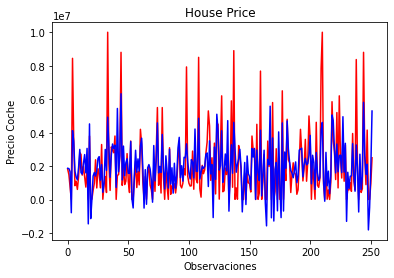

In [12]:
plt.plot(np.arange(0, len(y_test)), y_test, color = 'red')
plt.plot(np.arange(0, len(y_test)), y_pred, color = 'blue')
plt.title('House Price')
plt.xlabel('Observaciones')
plt.ylabel('Precio Coche')
plt.show()

In [13]:
metricas(y_test, y_pred)

R2 Score: 0.5831674138249271
MAE: 920427.6829200297
MSE: 1758067251175.464


### Regularización

### LASSO

In [14]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha = 0.0001)
lasso.fit(X_train_ss,y_train_ss)

Lasso(alpha=0.0001)

In [15]:
y_pred = lasso.predict(X_test_ss) * y_std + y_mean

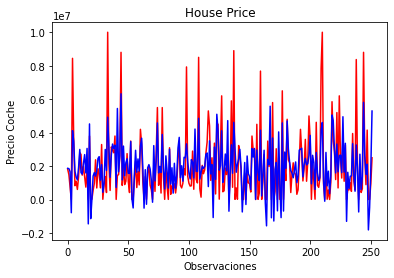

In [16]:
plt.plot(np.arange(0, len(y_test)), y_test, color = 'red')
plt.plot(np.arange(0, len(y_test)), y_pred, color = 'blue')
plt.title('House Price')
plt.xlabel('Observaciones')
plt.ylabel('Precio Coche')
plt.show()

In [17]:
metricas(y_test, y_pred)

R2 Score: 0.5831592926892806
MAE: 920339.0173435436
MSE: 1758101503542.2317


### Ridge

In [18]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha = 0.014)
ridge.fit(X_train_ss,y_train_ss)

Ridge(alpha=0.014)

In [19]:
y_pred = ridge.predict(X_test_ss) * y_std + y_mean

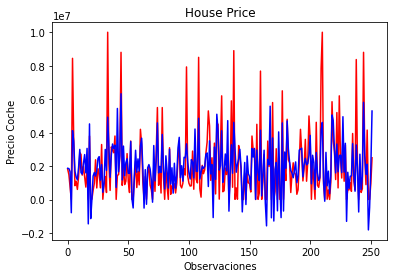

In [20]:
plt.plot(np.arange(0, len(y_test)), y_test, color = 'red')
plt.plot(np.arange(0, len(y_test)), y_pred, color = 'blue')
plt.title('House Price')
plt.xlabel('Observaciones')
plt.ylabel('Precio Coche')
plt.show()

In [21]:
metricas(y_test, y_pred)

R2 Score: 0.5831674028664664
MAE: 920427.6804935077
MSE: 1758067297394.7654


### Elastic Net

In [22]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(alpha=0.000001)

elastic.fit(X_train_ss,y_train_ss)

ElasticNet(alpha=1e-06)

In [23]:
y_pred = elastic.predict(X_test_ss) * y_std + y_mean

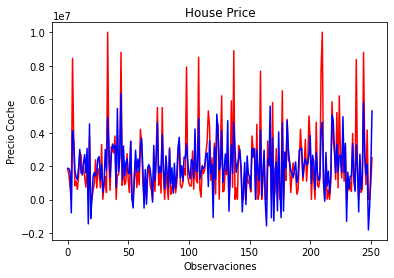

In [24]:
plt.plot(np.arange(0, len(y_test)), y_test, color = 'red')
plt.plot(np.arange(0, len(y_test)), y_pred, color = 'blue')
plt.title('House Price')
plt.xlabel('Observaciones')
plt.ylabel('Precio Coche')
plt.show()

In [25]:
metricas(y_test, y_pred)

R2 Score: 0.58316732597938
MAE: 920427.1560415883
MSE: 1758067621680.037


### LARS

In [26]:
from sklearn.linear_model import Lars

lars=Lars()
lars.fit(X_train_ss, y_train_ss)

Lars()

In [27]:
y_pred = lars.predict(X_test_ss) * y_std + y_mean

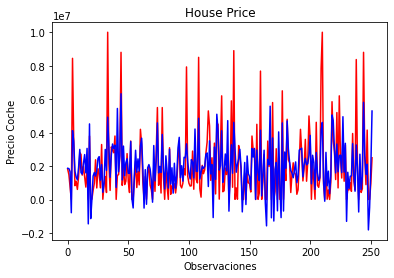

In [28]:
plt.plot(np.arange(0, len(y_test)), y_test, color = 'red')
plt.plot(np.arange(0, len(y_test)), y_pred, color = 'blue')
plt.title('House Price')
plt.xlabel('Observaciones')
plt.ylabel('Precio Coche')
plt.show()

In [29]:
metricas(y_test, y_pred)

R2 Score: 0.5831674138249275
MAE: 920427.6829200295
MSE: 1758067251175.4622


### Bayesian

In [30]:
from sklearn.linear_model import BayesianRidge

bayesian_ridge=BayesianRidge()
bayesian_ridge.fit(X_train_ss, y_train_ss)

/home/edco17/anaconda3/envs/tf15/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BayesianRidge()

In [31]:
y_pred = bayesian_ridge.predict(X_test_ss) * y_std + y_mean

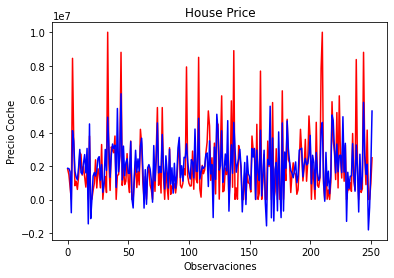

In [32]:
plt.plot(np.arange(0, len(y_test)), y_test, color = 'red')
plt.plot(np.arange(0, len(y_test)), y_pred, color = 'blue')
plt.title('House Price')
plt.xlabel('Observaciones')
plt.ylabel('Precio Coche')
plt.show()

In [33]:
metricas(y_test, y_pred)

R2 Score: 0.5831477296987784
MAE: 920423.3271023711
MSE: 1758150272557.9036
